# Лабораторная работа № 5

In [196]:
import numpy as np
import pandas as pd
import math
import collections
import matplotlib as plt
from openpyxl import Workbook
df = pd.read_excel("D:\DATAFRAME\En_In.xls")
VVP = pd.read_csv("D:\DATAFRAME\gpd.csv")
df = df.rename(columns = {'Unnamed: 2':'Country','Unnamed: 3':'Energy Supply',
                     'Unnamed: 4':'Energy Supply per Capita','Unnamed: 5':'%Renewable'})
df.drop(['Unnamed: 1','Unnamed: 0'],1, inplace=True)
df = df.iloc[17:244]
df.index = np.arange(len(df))
VVP.columns = VVP.iloc[3]
VVP = VVP.iloc[4::]
VVP.index = np.arange(len(VVP))
VVP.columns.name = ' '


In [197]:
#1

df.columns

Index(['Country', 'Energy Supply', 'Energy Supply per Capita', '%Renewable'], dtype='object')

In [198]:
#2
df['Energy Supply']=pd.to_numeric(df['Energy Supply'],errors='coerce')*1000000
df['Energy Supply per Capita']=pd.to_numeric(df['Energy Supply per Capita'],errors='coerce')
df.head(5)

,Country,Energy Supply,Energy Supply per Capita,%Renewable
0,Afghanistan,3.210000e+08,10.0,78.66928
1,Albania,1.020000e+08,35.0,100
2,Algeria,1.959000e+09,51.0,0.55101
3,American Samoa,NaN,NaN,0.641026
4,Andorra,9.000000e+06,121.0,88.69565


In [199]:
#3-4
df['Country'] = df['Country'].str.rsplit("(")
df['Country'] = df['Country'].str[0]
df['Country'] = df['Country'].str.rsplit("0")
df['Country'] = df['Country'].str[0]
df['Country'] = df['Country'].str.rsplit("1")
df['Country'] = df['Country'].str[0]
df['Country'] = df['Country'].str.rsplit("2")
df['Country'] = df['Country'].str[0]
df['Country'] = df['Country'].str.rsplit("3")
df['Country'] = df['Country'].str[0]
df['Country'] = df['Country'].str.rsplit("4")
df['Country'] = df['Country'].str[0]
df['Country'] = df['Country'].str.rsplit("5")
df['Country'] = df['Country'].str[0]
df['Country'] = df['Country'].str.rsplit("6")
df['Country'] = df['Country'].str[0]
df['Country'] = df['Country'].str.rsplit("7")
df['Country'] = df['Country'].str[0]
df['Country'] = df['Country'].str.rsplit("8")
df['Country'] = df['Country'].str[0]
df['Country'] = df['Country'].str.rsplit("9")
df['Country'] = df['Country'].str[0]
df = df.replace({'Republic of Korea':'South Korea',
                 'United States of America':'United States',
                'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
                'China, Hong Kong Special Administrative Region':'Hong Kong'})
df.loc[df['Country'].isin(['American Samoa','Hong Kong','South Korea','Bolivia'])]

,Country,Energy Supply,Energy Supply per Capita,%Renewable
3,American Samoa,NaN,NaN,0.641026
43,Hong Kong,5.850000e+08,82.0,0.000000
164,South Korea,1.100700e+10,221.0,2.279353


In [200]:
#3
df = df.replace({'Republic of Korea':'South Korea',
                 'United States of America':'United States',
                'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
                'China, Hong Kong Special Administrative Region':'Hong Kong'})
df.loc[df['Country'].isin(['South Korea','Hong Kong','United States','United Kingdom'])]

,Country,Energy Supply,Energy Supply per Capita,%Renewable
43,Hong Kong,5.850000e+08,82.0,0.000000
164,South Korea,1.100700e+10,221.0,2.279353
214,United Kingdom,7.920000e+09,124.0,10.600470
216,United States,9.083800e+10,286.0,11.570980


In [201]:
#4
df.loc[df['Country'].isin(['American Samoa','South Korea','Bolivia'])]

,Country,Energy Supply,Energy Supply per Capita,%Renewable
3,American Samoa,NaN,NaN,0.641026
164,South Korea,1.100700e+10,221.0,2.279353


In [202]:
#5
VVP = VVP.rename(columns = {'Country Name':'Country'})
VVP = VVP.replace({'Korea, Rep.':'South Korea',
                   'Iran, Islamic Rep.':'Iran',
                   'Hong Kong SAR, China':'Hong Kong'})
VVP[VVP['Country']=='Hong Kong']
VVP.head(3)

,Country,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
1,Andorra,AND,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
2,Afghanistan,AFG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10


In [203]:
#6

SCI = pd.read_excel("D:\DATAFRAME\scimagojr.xlsx")

SCI.head(30)

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.70,138
1,2,United States,96661,94747,792274,265436,8.20,230
2,3,Japan,30504,30287,223024,61554,7.31,134
3,4,United Kingdom,20944,20357,206091,37874,9.84,139
4,5,Russian Federation,18534,18301,34266,12422,1.85,57
5,6,Canada,17899,17620,215003,40930,12.01,149
6,7,Germany,17027,16831,140566,27426,8.26,126
7,8,India,15005,14841,128763,37209,8.58,115
8,9,France,13153,12973,130632,28601,9.93,114
9,10,South Korea,11983,11923,114675,22595,9.57,104


In [204]:
#7
VVP = VVP.drop(VVP.columns[[i for i in range(4,50)]], axis=1)

In [205]:
#7
result = pd.merge(SCI,df)
result = result.sort_values('Rank')
result = pd.merge(result, VVP).head(15)
result = result.set_index(['Country'])
result.drop(['Country Code', 'Indicator Name','Indicator Code'],1, inplace=True)
result

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,%Renewable,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


In [206]:
#8
def task_eight(x):
    return pd.Series((result[result.columns[10:20]].sum(axis = 1)/10).sort_values(ascending=False))
task_eight(result)

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Turkey                7.704245e+11
dtype: float64

In [207]:
#9
def task_nine(x):
    t = (result[result.columns[10:20]].sum(axis = 1)/10).sort_values(ascending=False)
    d = result[result.columns[19]]-result[result.columns[10]]
    return d[d.index == t.index[4]]
task_nine(result)

Country
France    1.533457e+11
dtype: float64

In [208]:
#10
def task_ten(result):
    temp = result['%Renewable'].sort_values(ascending = False)
    temp = temp.reset_index()
    return((temp['Country'].values[0],temp[temp.columns[1]].values[0]))
task_ten(result)

('Brazil', 69.64803)

In [209]:
#11
def task_eleven(result, n):
    temp = (result['Energy Supply']/result['Energy Supply per Capita']).sort_values(ascending=False)
    temp = temp.reset_index()
    return((temp['Country'].values[n-1], temp[temp.columns[1]].values[n-1]))
task_eleven(result,6)

('Japan', 127409395.97315437)

In [210]:
#12
temp = (result['Energy Supply']/result['Energy Supply per Capita'])
DC = temp/result['Citable documents']
DC.corr(temp)

0.6730728878603971

In [211]:
#13
def task_thirteen(result):
    temp = result['%Renewable'].head(math.ceil(len(result)/2))
    mediana = temp.values[len(temp)-1]
    temp = result['%Renewable']
    temp = temp.where(temp>mediana, 0)
    return temp.where(temp<=mediana, 1)
task_thirteen(result)

Country
China                 1.0
United States         0.0
Japan                 0.0
United Kingdom        0.0
Russian Federation    1.0
Canada                1.0
Germany               1.0
India                 0.0
France                1.0
South Korea           0.0
Italy                 1.0
Spain                 1.0
Australia             0.0
Brazil                1.0
Turkey                1.0
Name: %Renewable, dtype: float64

In [212]:
#14
Sum=[]
Mean=[]
Std=[]
ContinentDict = {'China':'Asia',
                 'United States':'North America',
                 'Japan':'Asia','United Kingdom':'Europe',
                 'Russian Federation':'Europe','Canada':'North America',
                 'Germany':'Europe',
                 'India':'Asia',
                 'France':'Europe',
                 'South Korea':'Asia',
                 'Italy':'Europe',
                 'Spain':'Europe',
                 'Iran':'Asia',
                 'Australia':'Australia',
                 'Brazil':'South America'}
coll = collections.Counter(ContinentDict.values())
temp1=pd.DataFrame(list(ContinentDict.items())).rename(columns={0: 'Country', 1: 'Continen'})
temp2=pd.concat([temp1.set_index('Country'), pd.DataFrame(result['Energy Supply']/result['Energy Supply per Capita']).rename(columns={0: 'People'})], axis='columns')
ff=pd.DataFrame(list(coll.items())).rename(columns={0: 'Continen', 1: 'size'}).set_index('Continen')
for i in range(5):
    Sum.append(temp2[temp2['Continen']==ff.index[i]].set_index('Continen').sum()[0])
    Mean.append(temp2[temp2['Continen']==ff.index[i]].set_index('Continen').mean()[0])
    Std.append(temp2[temp2['Continen']==ff.index[i]].set_index('Continen').std()[0])
ff['sum'] = pd.Series(Sum, index=ff.index)
ff['mean'] = pd.Series(Mean, index=ff.index)
ff['std'] = pd.Series(Std, index=ff.index)
ff

,size,sum,mean,std
Continen,,,,
Asia,5,2.821591e+09,7.053977e+08,7.138779e+08
North America,2,3.528552e+08,1.764276e+08,1.996696e+08
Europe,6,4.579297e+08,7.632161e+07,3.464767e+07
Australia,1,2.331602e+07,2.331602e+07,NaN
South America,1,2.059153e+08,2.059153e+08,NaN


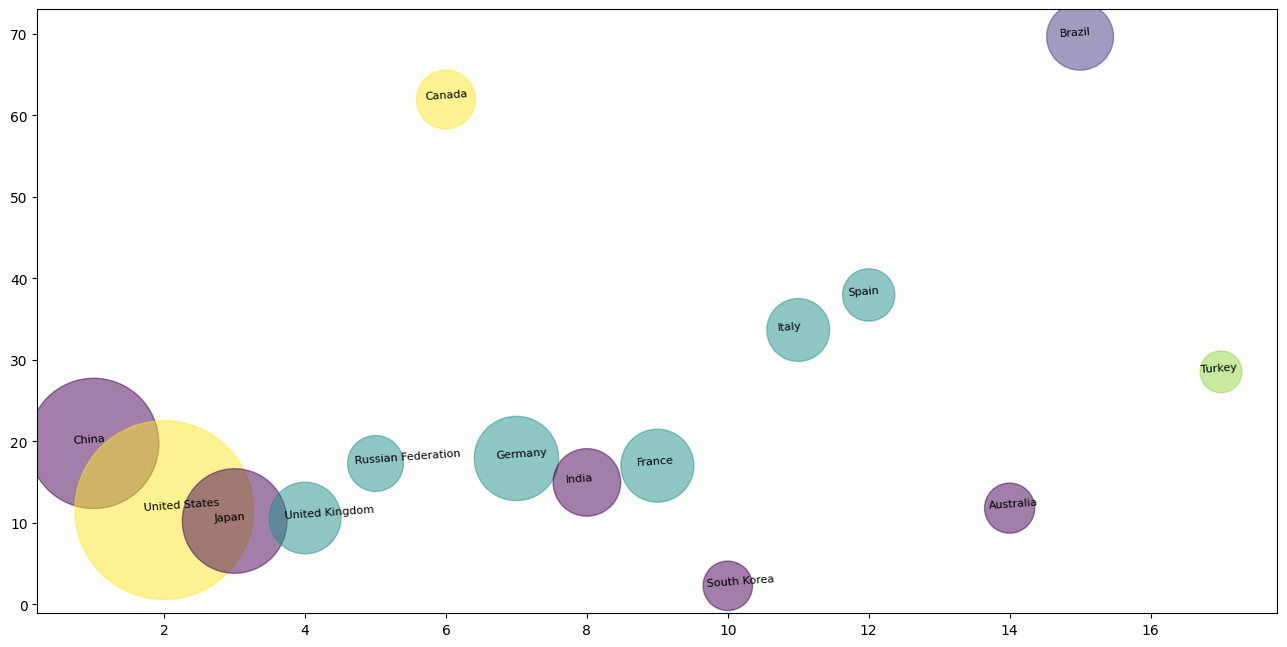

In [213]:
import matplotlib.pyplot as plt
colors = list(ContinentDict.values())
for index in range(len(colors)):
    colors[index]=len(colors[index])+coll[colors[index]]
x = result['Rank'].values
y = result['%Renewable'].values
plt.figure(figsize=(16, 8),dpi=100)
plt.scatter(x, y, c=colors, s=result[2015.0].values/1000000000, alpha=0.5, cmap='viridis')
for i in range(15):
    plt.text(x[i]-0.3, y[i],result.index[i],rotation=4, size=8)